In [1]:
import networkx as nx
G = nx.Graph()

In [2]:
num_nodes=int(input("Enter number of nodes in the graph:"))

#addinng the nodes into the graph
for i in range(num_nodes):
  G.add_node(i)

#accepting the adjacency matrix as input
print("Enter the adjacency matrix:")
adj_mat=[]
neighbours={}
for i in range (num_nodes):
  x = [int(x) for x in input("Enter the row : ").split()]
  adj_mat.append(x)
for i in range(num_nodes):
  l=[]
  for j in range(num_nodes):
    k=adj_mat[i][j]
    if(k==1):
      G.add_edge(i, j)
      l.append(j)
  neighbours[i]=l

Enter number of nodes in the graph:5
Enter the adjacency matrix:
Enter the row : 0 1 1 0 0
Enter the row : 1 0 0 1 1
Enter the row : 1 0 0 1 0
Enter the row : 0 1 1 0 0
Enter the row : 0 1 0 0 0


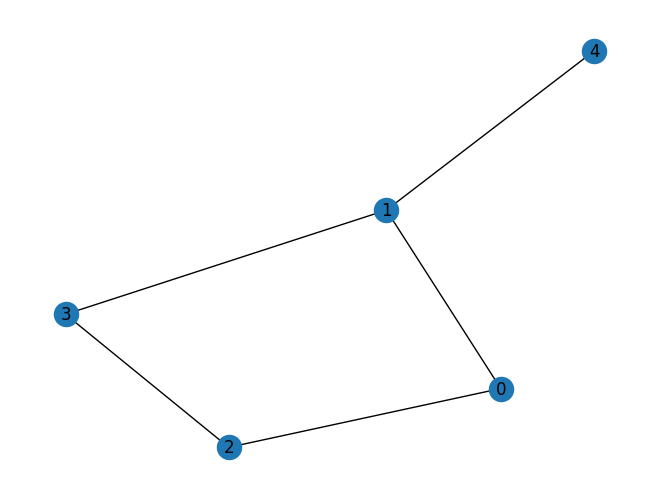

In [3]:
nx.draw(G,with_labels=True)

In [4]:
print("Enter the weights and the current status for each node:")
weight_st=[]
for i in range(num_nodes):
  x = [int(x) for x in input("Enter the weight and status : ").split()]
  weight_st.append(x)

print(weight_st)
print(neighbours)

Enter the weights and the current status for each node:
Enter the weight and status : 3 3
Enter the weight and status : 2 2
Enter the weight and status : 2 1
Enter the weight and status : 2 2
Enter the weight and status : 3 3
[[3, 3], [2, 2], [2, 1], [2, 2], [3, 3]]
{0: [1, 2], 1: [0, 3, 4], 2: [0, 3], 3: [1, 2], 4: [1]}


In [5]:

def job_allocation(systems,src):

  systems.pop(0)

  for system in systems:
    if(weight_st[system][0]>weight_st[system][1]):
      print("")
      print("The new job is allocated to the system or node:",system)
      print("The weight and the current status of the node Before allocation of new job:",weight_st)
      weight_st[system][1]=weight_st[system][1]+1
      print("The weight and the current status of the node After allocation of new job:",weight_st)
      t=nx.shortest_path(G, source=src, target=system)
      print("Number migrations for job allocation required is:",len(t)-1)
      return weight_st

    else:
      continue

  print("")
  print("No system in the network are free")
  return weight_st


In [6]:


def bfs(visited, graph, node):
  list_return=[]
  #function for BFS
  visited.append(node)
  queue.append(node)

  while queue:          # Creating loop to visit each node
    m = queue.pop(0)
    list_return.append(m)
    print (m, end = " ")

    for neighbour in graph[m]:
      if neighbour not in visited:
        visited.append(neighbour)
        queue.append(neighbour)
  return list_return


In [7]:

new_job= [int(x) for x in input("Enter the systems at which new jobs is to be allocated: ").split()]
print(new_job)
l=len(new_job)

for i in range(l):
  visited = [] # List for visited nodes.
  queue = []     #Initialize a queue
  if(weight_st[new_job[i]][0]>weight_st[new_job[i]][1]):
      print("")
      print("The new job is allocated to the system or node:",new_job[i])
      print("number migrations for job allocation required is:",0)
  else:
    print("Following is the Breadth-First Search")
    list_return=bfs(visited, neighbours, new_job[i])
    weight_st=job_allocation(list_return,new_job[i])

Enter the systems at which new jobs is to be allocated: 0 3
[0, 3]
Following is the Breadth-First Search
0 1 2 3 4 
The new job is allocated to the system or node: 2
The weight and the current status of the node Before allocation of new job: [[3, 3], [2, 2], [2, 1], [2, 2], [3, 3]]
The weight and the current status of the node After allocation of new job: [[3, 3], [2, 2], [2, 2], [2, 2], [3, 3]]
Number migrations for job allocation required is: 1
Following is the Breadth-First Search
3 1 2 0 4 
No system in the network are free
